In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [96]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [97]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [98]:
df.shape

(962, 2)

# Exploring Categories

In [99]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

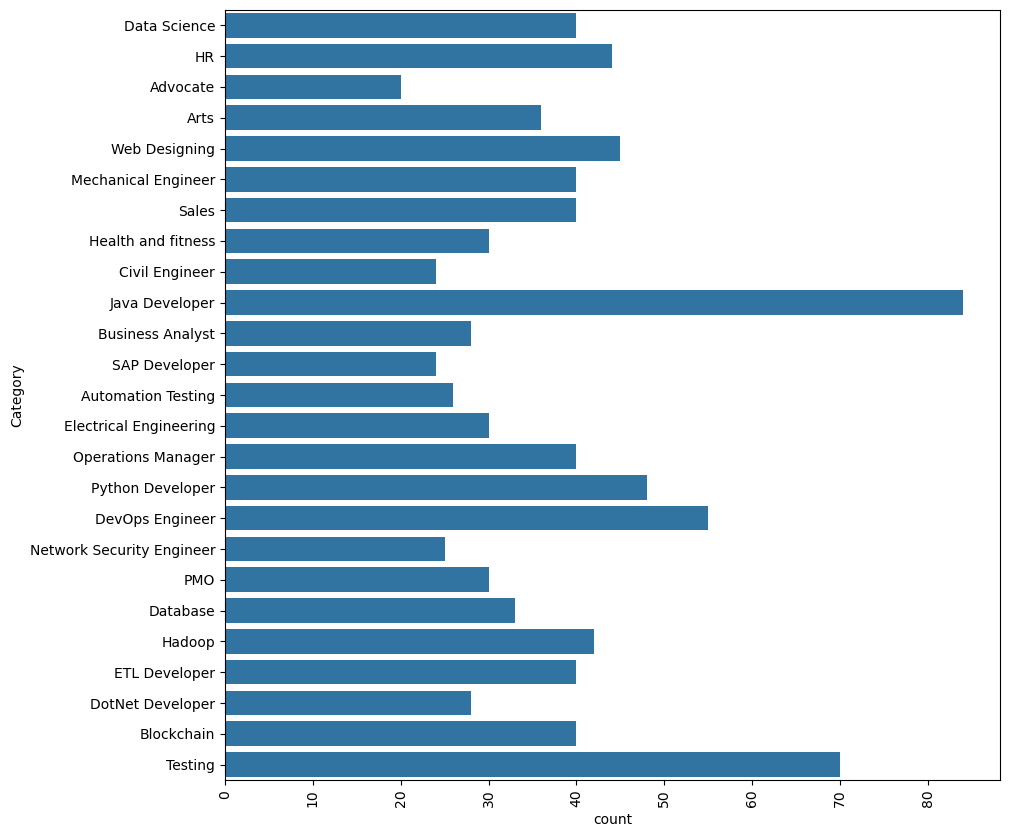

In [100]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(df['Category'])
plt.show()

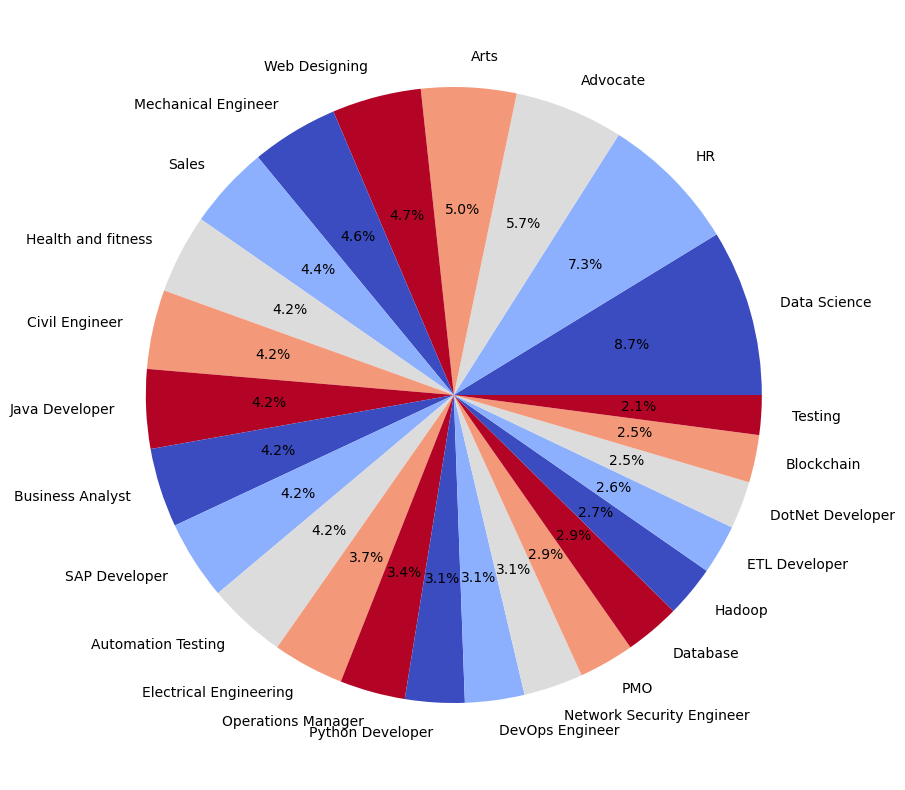

In [101]:
counts=df['Category'].value_counts()
labels =df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',colors=plt.cm.coolwarm(np.linspace(0,1,5)))
plt.show()


# Exploring Resume

In [102]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [103]:
df["Category"][0]

'Data Science'

# Cleaning Data

* URLs
* hashtags
* mentions
* special letters
* punctuation

In [104]:
import re

def cleanResume(txt):
    cleanTxt = re.sub(r'http\S+\s', ' ', txt)  # Remove URLs
    cleanTxt = re.sub(r'@\S+', ' ', cleanTxt)  # Remove mentions
    cleanTxt = re.sub(r'#\S+\s', ' ', cleanTxt)  # Remove hashtags
    cleanTxt = re.sub(r'\b(RT|cc)\b', ' ', cleanTxt, flags=re.IGNORECASE)  # Remove RT and cc
    cleanTxt = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_'{|}~"""), ' ', cleanTxt)  # Remove special characters
    cleanTxt = re.sub(r'[^\x00-\x7F]+', ' ', cleanTxt)  # Remove non-ASCII characters
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt).strip()  # Remove extra spaces
    return cleanTxt


In [105]:
cleanResume("my website link is this http://helloworld and welcome @gmail.com")

'my website link is this and welcome'

In [106]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [107]:
ctdf=df['Category'].unique()

In [108]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [109]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

In [110]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to accept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


# word into categorical values

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [112]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [113]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [114]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [120]:
newct=df['Category'].unique()

In [133]:
DataFramee=pd.DataFrame({'Category':ctdf,'representation':newct})

In [134]:
DataFramee=DataFrame.sort_values(by='representation')

In [135]:
DataFramee

,Category,representation
2,Advocate,0
3,Arts,1
12,Automation Testing,2
23,Blockchain,3
10,Business Analyst,4
8,Civil Engineer,5
0,Data Science,6
19,Database,7
16,DevOps Engineer,8
22,DotNet Developer,9


# Vactotization

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredText=tfidf.transform(df['Resume'])

In [137]:
requredText

<962x7347 sparse matrix of type '<class 'numpy.float64'>'
	with 164120 stored elements in Compressed Sparse Row format>

# Spliting 

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredText, df['Category'], test_size=0.2, random_state=42)

# Training the model and print the classification report :

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
Clf =OneVsRestClassifier(KNeighborsClassifier())
Clf.fit(X_train,y_train)
ypred=Clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


# Prediction System

In [162]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(Clf,open('Clf.pkl','wb'))

In [163]:
myresume="""I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [166]:
import pickle
tfidf=pickle.load(open('tfidf.pkl','rb'))
clf=pickle.load(open('clf.pkl','rb'))
clean_resume=cleanResume(myresume)
imput_features=tfidf.transform([clean_resume])
prediction_id =clf.predict(imput_features)[0]

In [167]:
print(prediction_id)

6


In [170]:
filtered_categories = DataFramee[DataFramee['representation'] == prediction_id]['Category'].tolist()

# Print the result
if filtered_categories:
    print("Categories with representation is :", filtered_categories)
else:
    print("Unknown")

Categories with representation is : ['Data Science']
